<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Outlier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
There is a need to find if an observation belongs to the same distribution as existing observations


"""

In [0]:
"""
Unsupervised Outlier Detection using Local Outlier Factor (LOF)
"""

"""It measures local deviation from densities of a given sample with respect to neigbors
It gives anomaly score depending on how isolated an object is with respect to its neighbors
By comparing the local density of a sample with the local densities of its neighbors
one can identify samples that have a substantially lower density than its neighbors.

"""

In [0]:
from sklearn.datasets import load_boston
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import SparsePCA

In [0]:
boston = load_boston()

X = boston.data
y= boston.target

In [11]:
pca = SparsePCA(n_components=2).fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


In [24]:
X_trans = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


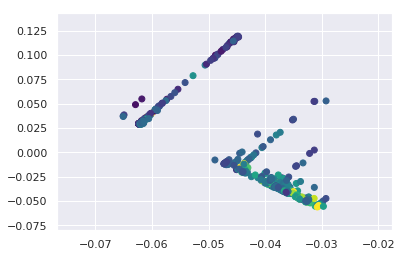

In [16]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, cmap='viridis')

In [0]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=.1)

In [0]:
outliers = clf.fit_predict(X_tranformed)

In [0]:
Xscore = clf.negative_outlier_factor_

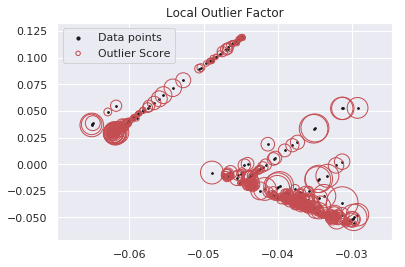

In [32]:
plt.title("Local Outlier Factor")
plt.scatter(X_trans[:, 0], X_trans[:, 1], color='k', s=3, label='Data points')

radius = (Xscore.max() - Xscore) / (Xscore.max() - Xscore.min())
plt.scatter(X_trans[:, 0], X_trans[:, 1], s=1000*radius, edgecolors='r', facecolor='none', label='Outlier Score')
plt.axis('tight')
#plt.xlim((-5, 5))
#plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

In [0]:
"""
Novelty Detection

Consider we add one more observation to the dataset . Is this data point different from rest


"""

In [0]:
from sklearn import svm

In [0]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

In [35]:
clf.fit(X_trans)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [0]:
y_outliers = clf.predict(X_trans)

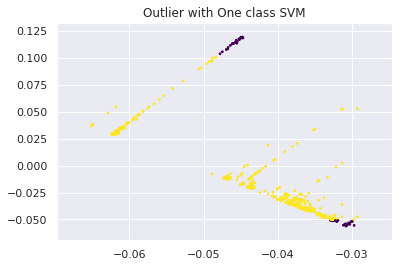

In [41]:
plt.title("Outlier with One class SVM")
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y_outliers, s=3, cmap='viridis')

In [0]:
"""
Isolation Forest
One efficient way to perform outlier detection in high dims is to use random forest.
The ensemble.IsolationForest isolates observations by randomly selecting a feature
and randomly selecting a split value between the maximum and minimum values of 
the selected feature

Recusive partitioning can be represented by a tree, the number of splitting required
to isolate a sample is equivalent to its distance from root

Random Sampling produces shorter paths for anomalies


"""

In [0]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(behaviour='new', max_samples=100, random_state=42, contamination='auto').fit(X_trans)

In [0]:
y_iso_outlier = clf.predict(X_trans)

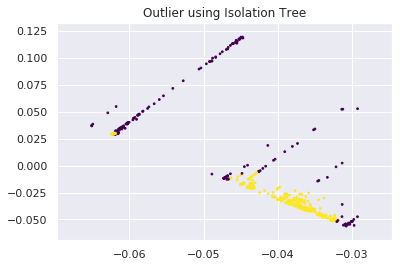

In [49]:
plt.title("Outlier using Isolation Tree")
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y_iso_outlier, s=3, cmap="viridis")